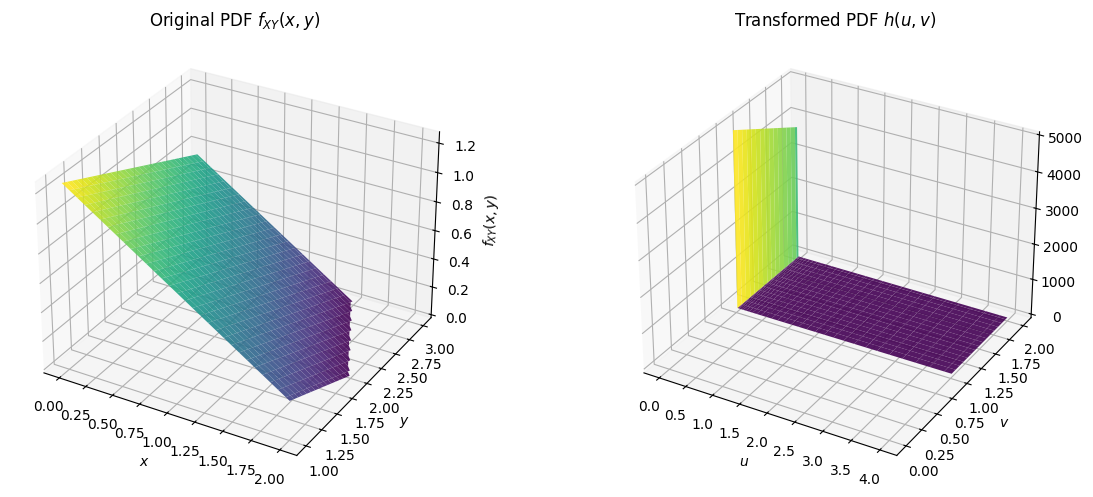

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Original domain ---
x = np.linspace(0, 2, 60)
y = np.linspace(1, 3, 60)
X, Y = np.meshgrid(x, y)

# Original pdf f_XY(x,y)
f_XY = (2*X + Y - 6) / -4
f_XY[f_XY < 0] = np.nan  # mask invalid region

# --- Transformation: U = X^2, V = Y - 1 ---
U = X**2
V = Y - 1

# To avoid division by zero at U=0
eps = 1e-8
sqrtU = np.sqrt(np.maximum(U, eps))

# Transformed pdf h(u,v)
h_UV = (2*sqrtU + V - 5) / (-8*sqrtU)
h_UV[(U < 0) | (U > 4) | (V < 1) | (V > 3)] = np.nan

# --- Plot side-by-side ---
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0.01, right=0.70)

# Reduce width by 10%
width_original = 0.42 * 0.9  # 10% smaller
width_transformed = 0.42 * 0.9

# Left plot: original PDF
ax1 = fig.add_axes([0.05, 0.15, width_original, 0.75], projection='3d')

ax1.plot_surface(X, Y, f_XY, cmap="viridis", edgecolor="none", alpha=0.9)
ax1.set_title("Original PDF $f_{XY}(x,y)$")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.set_zlabel("$f_{XY}(x,y)$")

# Right plot: transformed PDF
ax2 = fig.add_axes([0.55, 0.15, width_transformed, 0.75], projection='3d')  # move closer
ax2.plot_surface(U, V, h_UV, cmap="viridis", edgecolor="none", alpha=0.9)
ax2.set_title("Transformed PDF $h(u,v)$")
ax2.set_xlabel("$u$")
ax2.set_ylabel("$v$")
#ax2.set_zlabel("$h(u,v)$", fontsize=6) 

fig.savefig('img/jacob_transf.png', bbox_inches='tight')  # ensures labels not cut
plt.show()
